#Feature Extraction


The mapping from textual data to real valued vectors is called feature extration

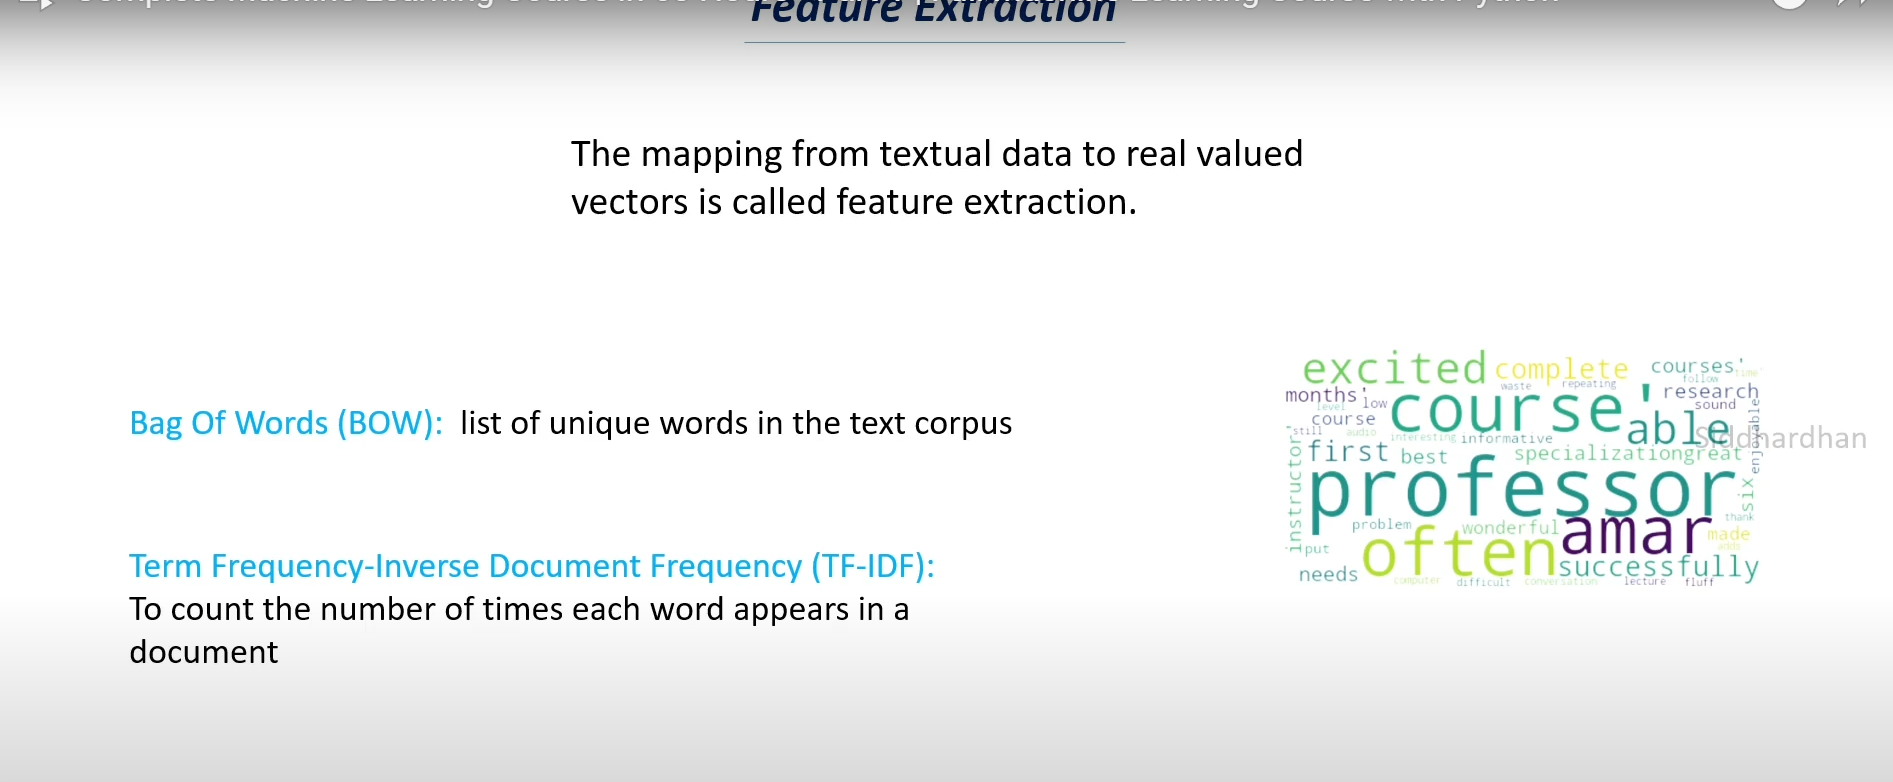

Tfidf does not understand the context of the words, it only counts it

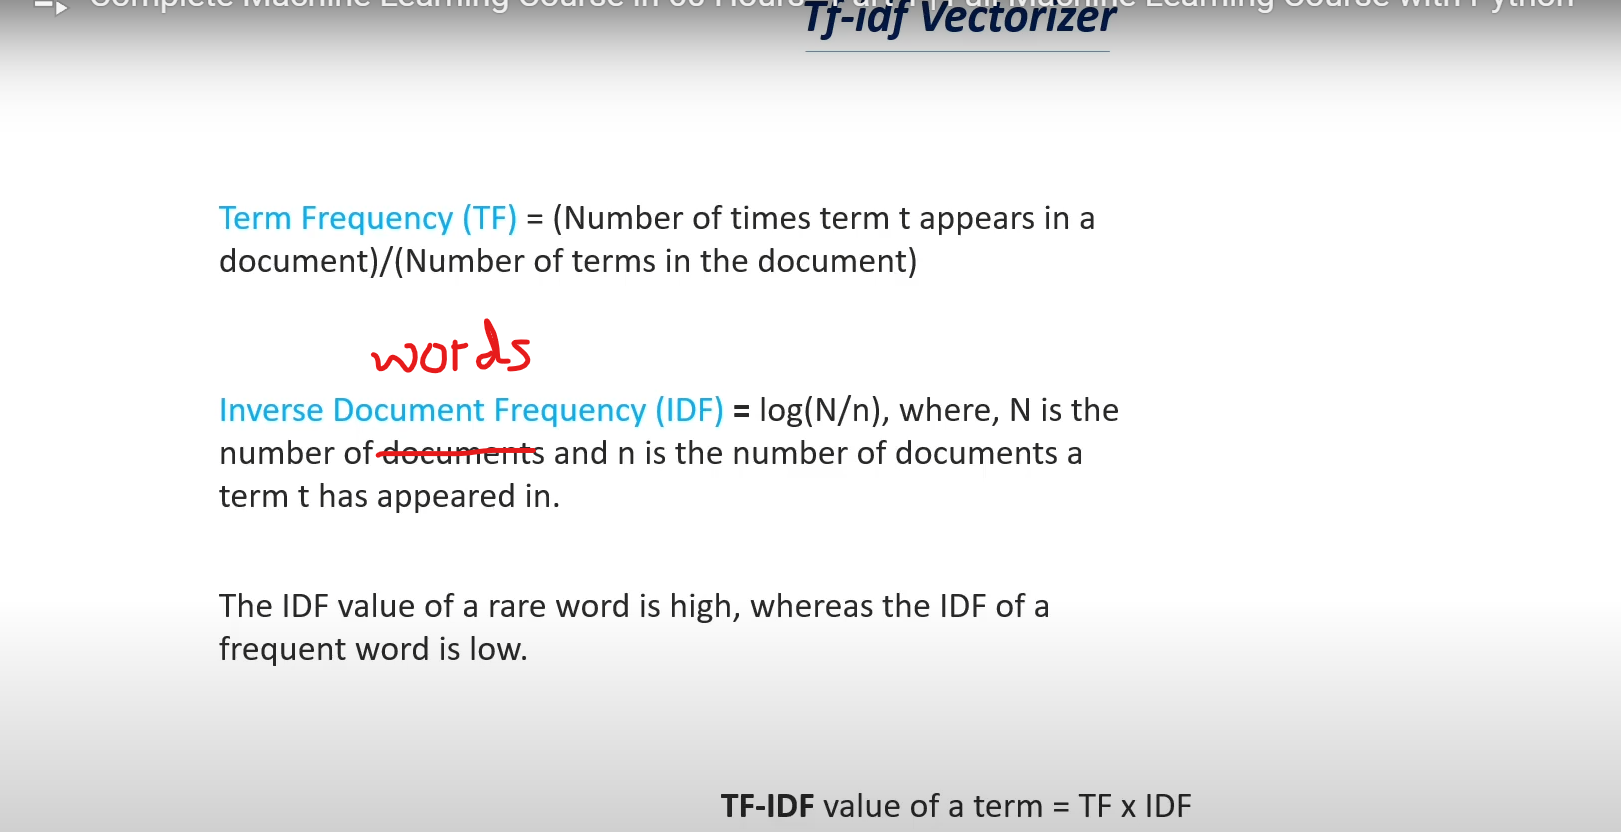

For binary classification problems, logisticRegression model is the best, as it gives very good accuracy_score

# About the Dataset:

id: unique id for a news article <br>
 title: the title of a news article <br>
 author: author of the news article <br>
 text: the text of the article; could be incomplete <br>
 label: a label that marks whether the news article is real or fake: <br>



#  1: Fake news 0: real News


In [92]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords              
#nltk -> natural language tool kit          
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [93]:
import nltk
nltk.download('stopwords')
#stopwords-> words that do not add meaning to the sentence (e.g. a, an , were,would ,etc)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [69]:
# loading the dataset to a pandas DataFrame
df = pd.read_csv('/content/fake_news_dataset.csv')

In [70]:
df.shape

(20800, 5)

In [95]:
# print the first 5 rows of the dataframe
df.head(2)

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...


In [72]:
# counting the number of missing values in the dataset
df.isnull().sum()
     

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [73]:

# replacing the null values with empty string
df = df.fillna('')

In [74]:
# merging the author name and news title
df['content'] = df['author']+' '+df['title']

In [96]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [76]:
# separating the data & label
X = df.drop(columns='label', axis=1)
Y = df['label']

In [98]:
print(X)


  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [97]:
print(Y)

[1 0 1 ... 0 1 1]


Stemming:

Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [78]:
port_stem = PorterStemmer()

In [106]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [105]:
df['content'] = df['content'].apply(stemming)

In [107]:
print(df['content'])

0        darrel lucu hou dem aid even see comey letter ...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exerci b...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [82]:
 #separating the data and label
X = df['content'].values
Y = df['label'].values

In [83]:
print(X)


['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [84]:
print(Y)


[1 0 1 ... 0 1 1]


In [85]:
Y.shape

(20800,)

#Tf-Idf

In [86]:
# convert the textual data to Feature Vectors
vectorizer = TfidfVectorizer()

In [87]:
vectorizer.fit(X)
X = vectorizer.transform(X)

In [88]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

#Splitting the dataset into training and test data

In [112]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)


In [113]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(16640, 17128) (16640,) (4160, 17128) (4160,)


Tranining the model : LOGISTIC REGRESSION

In [114]:
model=LogisticRegression()

In [117]:
model.fit(X_train,Y_train)

LogisticRegression()

Evaluation

In [118]:
# accuracy_score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [122]:
accuracy_percentage = round(training_data_accuracy*100,2)
print('Accuracy Score of the training data is ',accuracy_percentage,'%')

Accuracy Score of the training data is  98.66 %


In [123]:
 # accuracy_score on the testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [124]:
accuracy_percentage_test = round(testing_data_accuracy*100,2)
print('Accuracy Score of the testing data is ',accuracy_percentage_test,'%')

Accuracy Score of the testing data is  97.91 %


#Make a Predictive System

In [139]:
X_new = X_test[45]
prediction = model.predict(X_new)
print(prediction)

if prediction[0]==0:
  print('The news is real!')
else:
  print('The news is fake!')


[0]
The news is real!


In [140]:
print(Y_test[45])

0
